In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 경로 변수

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Dataton/data/"
DATA_PATH

'/content/drive/MyDrive/Dataton/data/'

- SEED 값

In [ ]:
SEED = 42

- 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}train.csv") # 학습용 구매기록 데이터
test = pd.read_csv(f"{DATA_PATH}test.csv") # 테스트용 구매기록 데이터

train.shape, test.shape

((103904, 25), (25976, 25))

In [ ]:
columns_map = {
    "id": "승객ID",
    "Gender": "성별",
    "Age": "나이",
    "Customer Type": "고객유형",
    "Type of Travel": "여행유형",
    "Class": "좌석등급",
    "Flight Distance": "비행거리",
    "Departure/Arrival time convenient": "시간편리성",
    "Departure Delay in Minutes": "출발지연",
    "Arrival Delay in Minutes": "도착지연",
    "Inflight wifi service": "기내와이파이",
    "Food and drink": "기내식",
    "Inflight entertainment": "기내엔터테인먼트",
    "On-board service": "탑승서비스",
    "Leg room service": "좌석공간",
    "Baggage handling": "수하물처리",
    "Checkin service": "체크인서비스",
    "Inflight service": "기내서비스",
    "Cleanliness": "청결도",
    "satisfaction": "만족도",
    "Ease of Online booking": "온라인_예약편의성",
    "Gate location": "탑승구_위치",
    "Online boarding": "온라인_탑승수속",
    "Seat comfort": "좌석편안함"
}

value_mappings = {
    "성별": {"Male": "남성", "Female": "여성"},
    "고객유형": {"Loyal Customer": "충성고객", "disloyal Customer": "비충성고객"},
    "여행유형": {"Business travel": "출장", "Personal Travel": "개인"},
    "좌석등급": {"Eco": "이코노미", "Eco Plus": "이코노미 플러스", "Business": "비즈니스"},
    "만족도": {"satisfied": "만족", "neutral or dissatisfied": "중립 또는 불만족"}
}

# 데이터 처리 함수
def process_data(data):
    data.rename(columns=columns_map, inplace=True)
    for column, mapping in value_mappings.items():
        if column in data.columns:
            data[column] = data[column].map(mapping)
    data.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")
    return data

# 데이터 처리
train = process_data(train)
test = process_data(test)

In [ ]:
from IPython.display import display, HTML
br_html = HTML("<br><br>")
display(HTML("<h1>학습용 구매기록 데이터</h1>"), train.head(), br_html)
display(HTML("<h1>테스트용 구매기록 데이터</h1>"), test.head(), br_html)

,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,온라인_예약편의성,...,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연,만족도
0,70172,남성,충성고객,13,개인,이코노미 플러스,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,중립 또는 불만족
1,5047,남성,비충성고객,25,출장,비즈니스,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,중립 또는 불만족
2,110028,여성,충성고객,26,출장,비즈니스,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,만족
3,24026,여성,충성고객,25,출장,비즈니스,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,중립 또는 불만족
4,119299,남성,충성고객,61,출장,비즈니스,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,만족


,승객ID,성별,고객유형,나이,여행유형,좌석등급,비행거리,기내와이파이,시간편리성,온라인_예약편의성,...,기내엔터테인먼트,탑승서비스,좌석공간,수하물처리,체크인서비스,기내서비스,청결도,출발지연,도착지연,만족도
0,19556,여성,충성고객,52,출장,이코노미,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,만족
1,90035,여성,충성고객,36,출장,비즈니스,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,만족
2,12360,남성,비충성고객,20,출장,이코노미,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,중립 또는 불만족
3,77959,남성,충성고객,44,출장,비즈니스,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,만족
4,36875,여성,충성고객,49,출장,이코노미,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,만족


In [ ]:
display(HTML("<h1>학습용 구매기록 데이터</h1>"))
display(train.info(), br_html)
display(HTML("<h1>테스트용 구매기록 데이터</h1>"))
display(test.info(), br_html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   승객ID       103904 non-null  int64  
 1   성별         103904 non-null  object 
 2   고객유형       103904 non-null  object 
 3   나이         103904 non-null  int64  
 4   여행유형       103904 non-null  object 
 5   좌석등급       103904 non-null  object 
 6   비행거리       103904 non-null  int64  
 7   기내와이파이     103904 non-null  int64  
 8   시간편리성      103904 non-null  int64  
 9   온라인_예약편의성  103904 non-null  int64  
 10  탑승구_위치     103904 non-null  int64  
 11  기내식        103904 non-null  int64  
 12  온라인_탑승수속   103904 non-null  int64  
 13  좌석편안함      103904 non-null  int64  
 14  기내엔터테인먼트   103904 non-null  int64  
 15  탑승서비스      103904 non-null  int64  
 16  좌석공간       103904 non-null  int64  
 17  수하물처리      103904 non-null  int64  
 18  체크인서비스     103904 non-null  int64  
 19  기내서비스      103904 non-n

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   승객ID       25976 non-null  int64  
 1   성별         25976 non-null  object 
 2   고객유형       25976 non-null  object 
 3   나이         25976 non-null  int64  
 4   여행유형       25976 non-null  object 
 5   좌석등급       25976 non-null  object 
 6   비행거리       25976 non-null  int64  
 7   기내와이파이     25976 non-null  int64  
 8   시간편리성      25976 non-null  int64  
 9   온라인_예약편의성  25976 non-null  int64  
 10  탑승구_위치     25976 non-null  int64  
 11  기내식        25976 non-null  int64  
 12  온라인_탑승수속   25976 non-null  int64  
 13  좌석편안함      25976 non-null  int64  
 14  기내엔터테인먼트   25976 non-null  int64  
 15  탑승서비스      25976 non-null  int64  
 16  좌석공간       25976 non-null  int64  
 17  수하물처리      25976 non-null  int64  
 18  체크인서비스     25976 non-null  int64  
 19  기내서비스      25976 non-null  int64  
 20  청결도   

None

- 타겟 데이터

In [ ]:
target = (train['만족도'] == '만족').astype(int)
target

,만족도
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [ ]:
train_ft = train.drop(columns=['만족도', '승객ID']).copy()
test_ft = test.drop(columns=['만족도', '승객ID']).copy()

In [ ]:
train_ft["도착지연"] = train_ft["도착지연"].fillna(0)
test_ft["도착지연"] = test_ft["도착지연"].fillna(0)

In [ ]:
train_ft.isnull().sum(), test_ft.isnull().sum()

(성별           0
 고객유형         0
 나이           0
 여행유형         0
 좌석등급         0
 비행거리         0
 기내와이파이       0
 시간편리성        0
 온라인_예약편의성    0
 탑승구_위치       0
 기내식          0
 온라인_탑승수속     0
 좌석편안함        0
 기내엔터테인먼트     0
 탑승서비스        0
 좌석공간         0
 수하물처리        0
 체크인서비스       0
 기내서비스        0
 청결도          0
 출발지연         0
 도착지연         0
 dtype: int64,
 성별           0
 고객유형         0
 나이           0
 여행유형         0
 좌석등급         0
 비행거리         0
 기내와이파이       0
 시간편리성        0
 온라인_예약편의성    0
 탑승구_위치       0
 기내식          0
 온라인_탑승수속     0
 좌석편안함        0
 기내엔터테인먼트     0
 탑승서비스        0
 좌석공간         0
 수하물처리        0
 체크인서비스       0
 기내서비스        0
 청결도          0
 출발지연         0
 도착지연         0
 dtype: int64)

# 특성 공학(Feature Engineering)

```
 0   승객ID       103904 non-null  int64  
 1   성별         103904 non-null  object
 2   고객유형       103904 non-null  object
 3   나이         103904 non-null  int64  
 4   여행유형       103904 non-null  object
 5   좌석등급       103904 non-null  object
 6   비행거리       103904 non-null  int64  
 7   기내와이파이     103904 non-null  int64  
 8   시간편리성      103904 non-null  int64  
 9   온라인 예약편의성  103904 non-null  int64  
 10  탑승구 위치     103904 non-null  int64  
 11  기내식        103904 non-null  int64  
 12  온라인 탑승수속   103904 non-null  int64  
 13  좌석편안함      103904 non-null  int64  
 14  기내엔터테인먼트   103904 non-null  int64  
 15  탑승서비스      103904 non-null  int64  
 16  좌석공간       103904 non-null  int64  
 17  수하물처리      103904 non-null  int64  
 18  체크인서비스     103904 non-null  int64  
 19  기내서비스      103904 non-null  int64  
 20  청결도        103904 non-null  int64  
 21  출발지연       103904 non-null  int64  
 22  도착지연       103594 non-null  float64
```

## 피처 만들기


In [ ]:
# 비슷한 부분끼리 묶기(2~3/4~5)
# 기내와이파이, 기내식, 좌석편안함, 좌석공간, 기내서비스, 기내엔터테인먼트, 청결도, 출발지연, 도착지연
# 시간편리성, 온라인 예약편의성, 탑승구 위치, 온라인 탑승수속, 탑승서비스, 수하물처리, 체크인서비스

In [ ]:
# 평균?
cols = ['기내와이파이', '기내식', '좌석편안함', '좌석공간', '기내서비스', '기내엔터테인먼트', '청결도']
sum_train = 0
sum_test = 0
for i in cols:
  sum_train += train_ft[i]
  sum_test += test_ft[i]
train_ft['기내_만족도'] = sum_train / len(cols)
test_ft['기내_만족도'] = sum_test / len(cols)

In [ ]:
cols = ['시간편리성', '온라인_예약편의성', '탑승구_위치', '온라인_탑승수속', '탑승서비스', '수하물처리', '체크인서비스']
sum_train = 0
sum_test = 0
for i in cols:
  sum_train += train_ft[i]
  sum_test += test_ft[i]
train_ft['기외_만족도'] = sum_train / len(cols)
test_ft['기외_만족도'] = sum_test / len(cols)

In [ ]:
# 출발지연+도착지연

In [ ]:
train_ft['딜레이'] = train_ft['출발지연'] + train_ft['도착지연']
train_ft = train_ft.drop(columns=['출발지연', '도착지연'])

test_ft['딜레이'] = test_ft['출발지연'] + test_ft['도착지연']
test_ft = test_ft.drop(columns=['출발지연', '도착지연'])

In [ ]:
# 연령대

In [ ]:
# bins = [0, 10, 20, 30, 40, 50, 60, np.inf]
# labels = ['10대이하', '10대', '20대', '30대', '40대', '50대', '60대이상']
# train_ft['연령대'] = pd.cut(train_ft['나이'], bins=bins, labels=labels)
# test_ft['연령대'] = pd.cut(test_ft['나이'], bins=bins, labels=labels)

In [ ]:
# 좌석 등급별 서비스 차이

In [ ]:
train_ft['좌석등급_서비스'] = train_ft['좌석등급'].map({'이코노미': 1, '이코노미 플러스': 2, '비즈니스': 3}) * train_ft['기내_만족도']
test_ft['좌석등급_서비스'] = test_ft['좌석등급'].map({'이코노미': 1, '이코노미 플러스': 2, '비즈니스': 3}) * test_ft['기내_만족도']

In [ ]:
# 청소년, 청년, 중년, 노년 기준
# 청년(19~34세), 중년(35~49세), 장년(50~64세), 노인(65세 이상)

In [ ]:
conditions = [
    train_ft['나이'] < 20,
    train_ft['나이'] < 35,
    train_ft['나이'] < 50
]

choices = ['청소년', '청년', '중년']

train_ft['연령별_호칭'] = np.select(conditions, choices, default='노년')

conditions = [
    test_ft['나이'] < 20,
    test_ft['나이'] < 35,
    test_ft['나이'] < 50
]

choices = ['청소년', '청년', '중년']

test_ft['연령별_호칭'] = np.select(conditions, choices, default='노년')

In [ ]:
train_ft['비행거리_연령대'] = train_ft['비행거리'] * train_ft['연령별_호칭'].map({'청소년': 1, '청년': 2, '중년': 3, '노년': 4})
test_ft['비행거리_연령대'] = test_ft['비행거리'] * test_ft['연령별_호칭'].map({'청소년': 1, '청년': 2, '중년': 3, '노년': 4})

## 피처들을 조합해서 새로운 범주형 피처를 만들기

- itertools
  - 효율적인 반복을 위한 이터레이터를 만드는 모듈
- itertools 에서 combinations 함수
  - 첫번째 인수로 반복가능한 객체 전달
  - 두번째 인수로 정수를 전달
    - 첫번째 인수로 전달된 반복가능한 객체에서 n개의 가능한 모든 조합을 튜플로 꺼내 준다.

In [ ]:
cols = [col for col in train_ft.columns if train_ft[col].dtype == 'object']
cols

['성별', '고객유형', '여행유형', '좌석등급', '연령별_호칭']

In [ ]:
cols = ['성별', '고객유형', '여행유형', '좌석등급']

In [ ]:
from itertools import combinations

for col in combinations(cols, 2):
    train_ft["_".join(col)] = train_ft[col[0]].astype(str) + "_" + train_ft[col[1]].astype(str)
    test_ft["_".join(col)] = test_ft[col[0]].astype(str) + "_" + test_ft[col[1]].astype(str)

In [ ]:
for col in combinations(cols, 3):
    print(col)

('성별', '고객유형', '여행유형')
('성별', '고객유형', '좌석등급')
('성별', '여행유형', '좌석등급')
('고객유형', '여행유형', '좌석등급')


In [ ]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

In [ ]:
train_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   나이         103904 non-null  int64  
 1   비행거리       103904 non-null  int64  
 2   기내와이파이     103904 non-null  int64  
 3   시간편리성      103904 non-null  int64  
 4   온라인_예약편의성  103904 non-null  int64  
 5   탑승구_위치     103904 non-null  int64  
 6   기내식        103904 non-null  int64  
 7   온라인_탑승수속   103904 non-null  int64  
 8   좌석편안함      103904 non-null  int64  
 9   기내엔터테인먼트   103904 non-null  int64  
 10  탑승서비스      103904 non-null  int64  
 11  좌석공간       103904 non-null  int64  
 12  수하물처리      103904 non-null  int64  
 13  체크인서비스     103904 non-null  int64  
 14  기내서비스      103904 non-null  int64  
 15  청결도        103904 non-null  int64  
 16  기내_만족도     103904 non-null  float64
 17  기외_만족도     103904 non-null  float64
 18  딜레이        103904 non-null  float64
 19  좌석등급_서비스   103904 non-n

In [ ]:
test_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   나이         25976 non-null  int64  
 1   비행거리       25976 non-null  int64  
 2   기내와이파이     25976 non-null  int64  
 3   시간편리성      25976 non-null  int64  
 4   온라인_예약편의성  25976 non-null  int64  
 5   탑승구_위치     25976 non-null  int64  
 6   기내식        25976 non-null  int64  
 7   온라인_탑승수속   25976 non-null  int64  
 8   좌석편안함      25976 non-null  int64  
 9   기내엔터테인먼트   25976 non-null  int64  
 10  탑승서비스      25976 non-null  int64  
 11  좌석공간       25976 non-null  int64  
 12  수하물처리      25976 non-null  int64  
 13  체크인서비스     25976 non-null  int64  
 14  기내서비스      25976 non-null  int64  
 15  청결도        25976 non-null  int64  
 16  기내_만족도     25976 non-null  float64
 17  기외_만족도     25976 non-null  float64
 18  딜레이        25976 non-null  float64
 19  좌석등급_서비스   25976 non-null  float64
 20  연령별_호칭

# 인코딩

## OneHot

In [ ]:
# , '연령대'
cols = ['성별_고객유형', '성별_여행유형', '성별_좌석등급', '고객유형_여행유형', '고객유형_좌석등급', '여행유형_좌석등급', '연령별_호칭']
cols

['성별_고객유형',
 '성별_여행유형',
 '성별_좌석등급',
 '고객유형_여행유형',
 '고객유형_좌석등급',
 '여행유형_좌석등급',
 '연령별_호칭']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(train_ft[cols])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
train_ft[enc.get_feature_names_out()] = enc.transform(train_ft[cols]).toarray()
test_ft[enc.get_feature_names_out()] = enc.transform(test_ft[cols]).toarray()

In [ ]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

In [ ]:
train_ft.head()

,나이,비행거리,기내와이파이,시간편리성,온라인_예약편의성,탑승구_위치,기내식,온라인_탑승수속,좌석편안함,기내엔터테인먼트,...,여행유형_좌석등급_개인_비즈니스,여행유형_좌석등급_개인_이코노미,여행유형_좌석등급_개인_이코노미 플러스,여행유형_좌석등급_출장_비즈니스,여행유형_좌석등급_출장_이코노미,여행유형_좌석등급_출장_이코노미 플러스,연령별_호칭_노년,연령별_호칭_중년,연령별_호칭_청년,연령별_호칭_청소년
0,13,460,3,4,3,1,5,3,5,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,25,235,3,2,3,3,1,3,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25,562,2,5,5,5,2,2,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,61,214,3,3,3,3,4,5,5,3,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# 스케일링

## MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [ ]:
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

In [ ]:
test_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   나이                        25976 non-null  float64
 1   비행거리                      25976 non-null  float64
 2   기내와이파이                    25976 non-null  float64
 3   시간편리성                     25976 non-null  float64
 4   온라인_예약편의성                 25976 non-null  float64
 5   탑승구_위치                    25976 non-null  float64
 6   기내식                       25976 non-null  float64
 7   온라인_탑승수속                  25976 non-null  float64
 8   좌석편안함                     25976 non-null  float64
 9   기내엔터테인먼트                  25976 non-null  float64
 10  탑승서비스                     25976 non-null  float64
 11  좌석공간                      25976 non-null  float64
 12  수하물처리                     25976 non-null  float64
 13  체크인서비스                    25976 non-null  float64
 14  기내서비스 

# 모델

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(5, shuffle=True, random_state=SEED)

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=SEED, max_features=None)
scores = cross_val_score(model, train_ft,target, cv= cv , n_jobs=-1, scoring="f1_macro")
scores.mean()

0.9619073614482619

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, penalty='', solver='saga')
scores = cross_val_score(model,train_ft, target, scoring="f1_macro", cv=cv, n_jobs=-1)
scores.mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'elasticnet', 'l2'} or None. Got '' instead.


# XAI

In [ ]:
model.fit(train_ft, target)

RandomForestClassifier(max_features=None, random_state=42)

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(test_ft)
shap_values

array([[[-4.29640094e-03,  4.29640094e-03],
        [-1.48067537e-03,  1.48067537e-03],
        [-2.93593850e-01,  2.93593850e-01],
        ...,
        [-2.66970803e-05,  2.66970803e-05],
        [ 3.19051258e-04, -3.19051258e-04],
        [-2.27882771e-05,  2.27882771e-05]],

       [[ 7.86538414e-03, -7.86538414e-03],
        [-4.09894812e-03,  4.09894812e-03],
        [-6.58925966e-02,  6.58925966e-02],
        ...,
        [-1.98367851e-04,  1.98367851e-04],
        [ 1.34057778e-04, -1.34057778e-04],
        [-1.20453986e-05,  1.20453986e-05]],

       [[-2.91556020e-03,  2.91556020e-03],
        [ 1.00027691e-02, -1.00027691e-02],
        [ 1.48810294e-01, -1.48810294e-01],
        ...,
        [ 1.38083107e-03, -1.38083107e-03],
        [-1.50727613e-04,  1.50727613e-04],
        [-3.74337294e-05,  3.74337294e-05]],

       ...,

       [[ 3.88871807e-04, -3.88871807e-04],
        [ 7.57378627e-05, -7.57378627e-05],
        [ 1.50589407e-01, -1.50589407e-01],
        ...,
     

In [ ]:
shap_values.shape

(25976, 55, 2)

In [ ]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and direc

In [ ]:
shap_values_indexing = shap_values[:, :, 1]

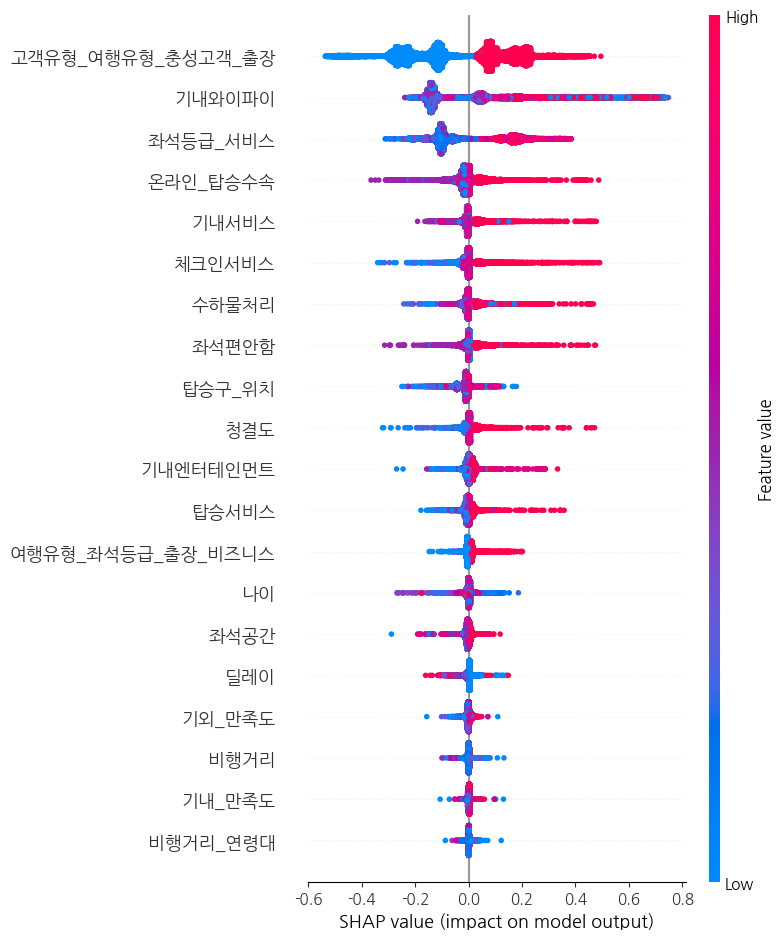

In [ ]:
shap.summary_plot(shap_values_indexing, test_ft)

In [ ]:
for col in test_ft.columns:
    shap.dependence_plot(col, shap_values_indexing, test_ft)
    print()

Output hidden; open in https://colab.research.google.com to view.

# 항상 확인하기
- 학습데이터와 테스트 데이터의 피처개수는 동일해야 함

In [ ]:
train_ft.shape

# 추출한 피처 저장하기

In [ ]:
train_ft.to_csv(f"{DATA_PATH}train_preprocessing.csv",index=False)
# test_ft.to_csv(f"{DATA_PATH}test_common.csv",index=False)

In [ ]:
target.to_csv(f"{DATA_PATH}target.csv",index=False)